In [72]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution2D,Activation,MaxPool2D,Flatten,Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as processimage
from keras.models import load_model

In [73]:
#设置参数
nb_class=10
nb_epoch=4
batchsize=1024
#拉取原始数据
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
print (X_train.shape,Y_train.shape)
print (X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [74]:
#准备数据
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255
X_test/=255

In [75]:
#热独码Y
Y_train = np_utils.to_categorical(Y_train,nb_class)
Y_test = np_utils.to_categorical(Y_test,nb_class)

In [76]:
model = Sequential()

In [77]:
#1st conv layer
model.add(Convolution2D(
    filters = 32,
    kernel_size = (5,5),
    padding = 'same',
    input_shape = (28,28,1)
))
model.add(Activation('relu'))

model.add(MaxPool2D(
    pool_size = (2,2),
    strides = (2,2),
    padding = 'same',
))

#2nd conv layer
model.add(Convolution2D(
    filters = 64,
    kernel_size = (5,5),
    padding = 'same',
))
model.add(Activation('relu'))

model.add(MaxPool2D(
    pool_size = (2,2),
    strides = (2,2),
    padding = 'same',
))

#1st fully connected layer
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))

#2nd fully connected layer
model.add(Dense(10))
model.add(Activation('softmax'))

#optimizer
adam = Adam(lr = 0.0001)

NameError: name 'layer' is not defined

In [7]:
#编译网络
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

W0921 15:50:43.766136 17380 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0921 15:50:43.802875 17380 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
#开始
model.fit(
    X_train,
    Y_train,
    epochs=nb_epoch,
    batch_size=batchsize,
    validation_data=(X_test,Y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 58s 974us/step - loss: 0.4430 - acc: 0.8717 - val_loss: 0.1009 - val_acc: 0.9690
Epoch 2/4
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0796 - acc: 0.9765 - val_loss: 0.0478 - val_acc: 0.9840
Epoch 3/4
60000/60000 [==============================] - 58s 971us/step - loss: 0.0523 - acc: 0.9842 - val_loss: 0.0378 - val_acc: 0.9865
Epoch 4/4
60000/60000 [==============================] - 59s 978us/step - loss: 0.0394 - acc: 0.9879 - val_loss: 0.0387 - val_acc: 0.9870


In [10]:
model.save('cnn_handwriting.h5')

In [78]:
model = load_model('cnn_handwriting.h5')
model.summary()
config = model.get_config()
print (config)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
__________

label---> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


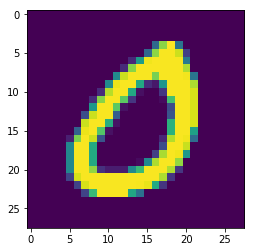

In [13]:
testrun = X_test[8731].reshape(-1,28,28,1)
testlabel = Y_test[8731]
print('label--->',testlabel)
plt.imshow(testrun.reshape([28,28]))

In [14]:
pred = model.predict(testrun)
print('predict result--->',pred)
print([result.argmax() for result in pred])


predict result---> [[9.9999964e-01 2.2913560e-10 2.3301038e-07 7.1328977e-11 1.1128781e-09
  8.9857061e-10 1.1806173e-09 2.3501421e-09 2.7705389e-09 1.0179295e-07]]
[0]


reshape前----> (28, 28)
[[8.9116317e-01 1.5513304e-07 4.5239495e-04 1.3075834e-04 3.4934509e-04
  7.0463226e-04 9.2606046e-05 3.3313467e-04 3.4923866e-04 1.0642457e-01]]
(1, 10)
[0]


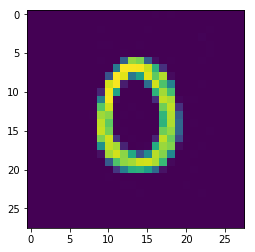

In [54]:
#自己的图预测
target_img = processimage.imread(r'C:\Users\HP\Documents\Tencent Files\1034271325\FileRecv\num0.jpg')
print ('reshape前---->',target_img.shape)
plt.imshow(target_img)
target_img = target_img.reshape(-1,28,28,1)
target_img=np.array(target_img)
target_img=target_img.astype('float32')
target_img/=255

mypred = model.predict(target_img)
print(mypred)
print(mypred.shape)
print([myresult.argmax() for myresult in mypred])